In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

import importlib
import sys
sys.path.append('../src')

from display_network import display_graph_pyvis

In [4]:
def merge_sorted_lists(list1, list2):

    def safe_index(lst, i):
        if (i >= 0 and i < len(lst)) or (i < 0 and i >= -len(lst)):
            return lst[i].lower()
        else:
            return chr(1114111)
    
    # Initialize pointers for both lists
    i, j = 0, 0
    merged_list = []
    list1_inds = []
    list2_inds = []
    
    curr_ind = -1
    # Traverse both lists and insert smaller value from either list into the merged list
    while i < len(list1) or j < len(list2):

        # print(merged_list)
        # print("1", safe_index(list1, i), i)
        # print("2", safe_index(list2, j), j)
        
        # never repeat an entry
        # you're only ever at risk of doing this if the last entry is the same as your current one
        if safe_index(list1, i) == safe_index(merged_list, -1):
            # print("1 repeat")
            list1_inds.append(curr_ind)
            i += 1
        elif safe_index(list2, j) == safe_index(merged_list, -1):
            # print("2 repeat")
            list2_inds.append(curr_ind)
            j += 1
        elif safe_index(list1, i) < safe_index(list2, j):
            # print("1 add")
            curr_ind += 1
            list1_inds.append(curr_ind)
            merged_list.append(list1[i])
            i += 1
        else:
            curr_ind += 1
            list2_inds.append(curr_ind)
            merged_list.append(list2[j])
            # print("2 add")
            j += 1

    return merged_list, list1_inds, list2_inds

In [5]:
# list 2 is a subset
lst1 = ["a", "b", "d", "d", "e", "f"]
lst2 = ["b", "d"]
exp_merge = ["a", "b", "d", "e", "f"]

exp_l1_inds = [0, 1, 2, 2, 3, 4]
exp_l2_inds = [1, 2]

merge_list, l1_inds, l2_inds = merge_sorted_lists(lst1, lst2)
assert merge_list == exp_merge
assert exp_l1_inds == l1_inds
assert exp_l2_inds == l2_inds

# completely disjoint
lst1 = ["a", "b", "c", "c"]
lst2 = ["d", "e", "f", "f"]
exp_merge = ["a", "b", "c", "d", "e", "f"]

exp_l1_inds = [0, 1, 2, 2]
exp_l2_inds = [3, 4, 5, 5]

merge_list, l1_inds, l2_inds = merge_sorted_lists(lst1, lst2)
assert merge_list == exp_merge
assert exp_l1_inds == l1_inds
assert exp_l2_inds == l2_inds

# finish list 1 first
lst1 = ["a", "b", "d"]
lst2 = ["b", "c", "e", "f", "g"]
exp_merge = list("abcdefg")

exp_l1_inds = [0, 1, 3]
exp_l2_inds = [1, 2, 4, 5, 6]

merge_list, l1_inds, l2_inds = merge_sorted_lists(lst1, lst2)
assert merge_list == exp_merge
assert exp_l1_inds == l1_inds
assert exp_l2_inds == l2_inds

# finish list 2 first
lst1 = list("abdeg")
lst2 = list("abc")
exp_merge = list("abcdeg")

exp_l1_inds = [0, 1, 3, 4, 5]
exp_l2_inds = [0, 1, 2]

merge_list, l1_inds, l2_inds = merge_sorted_lists(lst1, lst2)
assert merge_list == exp_merge
assert exp_l1_inds == l1_inds
assert exp_l2_inds == l2_inds

# add from list 2 and then get to an equal entry in list 1
lst1 = list("abcd")
lst2 = list("be")
exp_merge = list("abcde")

exp_l1_inds = [0, 1, 2, 3]
exp_l2_inds = [1, 4]

merge_list, l1_inds, l2_inds = merge_sorted_lists(lst1, lst2)
assert merge_list == exp_merge
assert exp_l1_inds == l1_inds
assert exp_l2_inds == l2_inds

# get to an equal entry at hte same time
lst1 = list("abcd")
lst2 = list("bbe")
exp_merge = list("abcde")

exp_l1_inds = [0, 1, 2, 3]
exp_l2_inds = [1, 1, 4]

merge_list, l1_inds, l2_inds = merge_sorted_lists(lst1, lst2)
assert merge_list == exp_merge
assert exp_l1_inds == l1_inds
assert exp_l2_inds == l2_inds

# add and then get multiple equal entries in both
lst1 = list("abbbcccd")
lst2 = list("bbee")
exp_merge = list("abcde")

exp_l1_inds = [0, 1, 1, 1, 2, 2, 2, 3]
exp_l2_inds = [1, 1, 4, 4]

merge_list, l1_inds, l2_inds = merge_sorted_lists(lst1, lst2)
assert merge_list == exp_merge
assert exp_l1_inds == l1_inds
assert exp_l2_inds == l2_inds

# multiple equal entries and list 2 finishes last
lst1 = list("abbbcccd")
lst2 = list("beefggh")
exp_merge = list("abcdefgh")

exp_l1_inds = [0, 1, 1, 1, 2, 2, 2, 3]
exp_l2_inds = [1, 4, 4, 5, 6, 6, 7]

merge_list, l1_inds, l2_inds = merge_sorted_lists(lst1, lst2)
assert merge_list == exp_merge
assert exp_l1_inds == l1_inds
assert exp_l2_inds == l2_inds

# multiple equal entries and list 1 finishes last
lst1 = list("abbbcccdijkkl")
lst2 = list("beefgghii")
exp_merge = list("abcdefghijkl")

exp_l1_inds = [0, 1, 1, 1, 2, 2, 2, 3, 8, 9, 10, 10, 11]
exp_l2_inds = [1, 4, 4, 5, 6, 6, 7, 8, 8]

merge_list, l1_inds, l2_inds = merge_sorted_lists(lst1, lst2)
assert merge_list == exp_merge
assert exp_l1_inds == l1_inds
assert exp_l2_inds == l2_inds

# repeats at the beginning
lst1 = list("abbbcccdijkkl")
lst2 = list("aabeefgghii")
exp_merge = list("abcdefghijkl")

exp_l1_inds = [0, 1, 1, 1, 2, 2, 2, 3, 8, 9, 10, 10, 11]
exp_l2_inds = [0, 0, 1, 4, 4, 5, 6, 6, 7, 8, 8]

merge_list, l1_inds, l2_inds = merge_sorted_lists(lst1, lst2)
assert merge_list == exp_merge
assert exp_l1_inds == l1_inds
assert exp_l2_inds == l2_inds

print(exp_l1_inds, l1_inds)
print(exp_l2_inds, l2_inds)

[0, 1, 1, 1, 2, 2, 2, 3, 8, 9, 10, 10, 11] [0, 1, 1, 1, 2, 2, 2, 3, 8, 9, 10, 10, 11]
[0, 0, 1, 4, 4, 5, 6, 6, 7, 8, 8] [0, 0, 1, 4, 4, 5, 6, 6, 7, 8, 8]


In [6]:
def combine_variable_matrix_stacks(var_list_1, var_list_2, var_mat_1, var_mat_2):
    var_list, l1_indices, l2_indices = merge_sorted_lists(var_list_1, var_list_2)
    
    def make_super_matrix_stack(old_mat, submat_indices, new_size):
        new_matrix_stack = np.full((old_mat.shape[0], new_size, new_size), np.nan)
        dim1 = np.ix_(submat_indices, submat_indices)[0]
        dim2 = np.ix_(submat_indices, submat_indices)[1]
        new_matrix_stack[:, dim1, dim2] = old_mat

        return new_matrix_stack

    new_var_mat_1 = make_super_matrix_stack(var_mat_1, l1_indices, len(var_list))
    new_var_mat_2 = make_super_matrix_stack(var_mat_2, l2_indices, len(var_list))

    new_var_mat = np.concatenate((new_var_mat_1, new_var_mat_2), axis=0)

    return var_list, new_var_mat

In [7]:
variables_test_1 = ["ant", "bee", "dog"]
variables_test_2 = ["ant", "cat", "dog"]

var_arr_1 = np.array([[[1, 2, 4],
                       [2, 4, 8],
                       [4, 8, 16]],
                      [[0.5, 1, 2],
                       [1, 2, 4],
                       [2, 4, 8]]])

var_arr_2 = np.array([[[1, 3, 4],
                       [3, 9, 12],
                       [4, 12, 16]]])

exp_merge = np.array([[[1, 2, np.nan, 4],
                       [2, 4, np.nan, 8],
                       [np.nan, np.nan, np.nan, np.nan],
                       [4, 8, np.nan, 16]],
                      [[0.5, 1, np.nan, 2],
                       [1, 2, np.nan, 4],
                       [np.nan, np.nan, np.nan, np.nan],
                       [2, 4, np.nan, 8]],
                      [[1, np.nan, 3, 4],
                       [np.nan, np.nan, np.nan, np.nan],
                       [3, np.nan, 9, 12],
                       [4, np.nan, 12, 16]]])

var_list, var_mat = combine_variable_matrix_stacks(variables_test_1, variables_test_2, var_arr_1, var_arr_2)

assert var_list == ["ant", "bee", "cat", "dog"]
assert ((var_mat == exp_merge) | (np.isnan(var_mat) & np.isnan(exp_merge))).all()

In [8]:
variables_test_1 = ["apple", "balfour", "danube", "epcot", "gobbledygook"]
variables_test_2 = ["apple", "cobra", "epcot", "fantasia", "hedonic"]

var_arr_1 = np.arange(25).reshape(1, 5, 5)
var_arr_2 = np.arange(25, 50).reshape(1, 5, 5)

exp_merge = np.array([[[0, 1, np.nan, 2, 3, np.nan, 4, np.nan],
                       [5, 6, np.nan, 7, 8, np.nan, 9, np.nan],
                       [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
                       [10, 11, np.nan, 12, 13, np.nan, 14, np.nan],
                       [15, 16, np.nan, 17, 18, np.nan, 19, np.nan],
                       [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
                       [20, 21, np.nan, 22, 23, np.nan, 24, np.nan],
                       [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]],
                      [[25, np.nan, 26, np.nan, 27, 28, np.nan, 29],
                       [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
                       [30, np.nan, 31, np.nan, 32, 33, np.nan, 34], 
                       [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
                       [35, np.nan, 36, np.nan, 37, 38, np.nan, 39], 
                       [40, np.nan, 41, np.nan, 42, 43, np.nan, 44],
                       [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
                       [45, np.nan, 46, np.nan, 47, 48, np.nan, 49]]])

var_list, var_mat = combine_variable_matrix_stacks(variables_test_1, variables_test_2, var_arr_1, var_arr_2)
assert ((var_mat == exp_merge) | (np.isnan(var_mat) & np.isnan(exp_merge))).all()

In [9]:
def csv_to_list(path):
    # Initialize an empty list to store the strings
    lines = []

    # Open the CSV file and read it
    with open(path, mode='r') as file:
        reader = csv.reader(file)
        for row in reader:
            # Join the row into a single string separated by commas
            line = ','.join(row)
            lines.append(line)
    
    return sorted(lines)

In [10]:
import csv

vars_1 = csv_to_list("../out/belief networks/1972-1976, R=0.2, Condition=None/variables_list.csv")
print(len(vars_1))
vars_2 = csv_to_list("../out/belief networks/1974-1978, R=0.2, Condition=None/variables_list.csv")
print(len(vars_2))

var_mat_1 = np.genfromtxt("../out/belief networks/1972-1976, R=0.2, Condition=None/correlation_matrix_partial.csv", delimiter=',').reshape(1, len(vars_1), len(vars_1))
var_mat_2 = np.genfromtxt("../out/belief networks/1974-1978, R=0.2, Condition=None/correlation_matrix_partial.csv", delimiter=',').reshape(1, len(vars_2), len(vars_2))

var_list, var_mat = combine_variable_matrix_stacks(vars_1, vars_2, var_mat_1, var_mat_2)


66
76


In [103]:
def make_edge_time_series_from_graph(start_year, end_year, interval, overlap, node1, node2):
    curr_year = start_year
    edge_weights = []
    years = []
    while curr_year + interval <= end_year:
        path = f"../out/belief networks/{curr_year}-{curr_year + interval}, R=0.2, Condition=None"
        G = nx.read_graphml(os.path.join(path, "graph_object.graphml"))
        var_list = csv_to_list(os.path.join(path, "variables_list.csv"))
        print(curr_year)
        print(node1, node1 in G, node2, node2 in G)
        print(node1, node1 in var_list, node2, node2 in var_list)
        
        if node1 in G and node2 in G:
            edge_data = G.get_edge_data(node1, node2)

            if edge_data is None:
                edge_val = 0
            else:
                edge_val = edge_data.get('weight')
        else:
            edge_val = None

        years.append(curr_year)
        edge_weights.append(edge_val)
        curr_year = curr_year + interval - overlap
  

    return edge_weights, years

In [12]:
def make_edge_time_series(start_year, end_year, interval, overlap):
    curr_year = start_year
    years = []
    while curr_year + interval <= end_year:
        path = f"../out/belief networks/{curr_year}-{curr_year + interval}, R=0.2, Condition=None"
        print(path)
        new_var_list = csv_to_list(os.path.join(path, "variables_list.csv"))
        l = len(new_var_list)
        new_data = np.genfromtxt(os.path.join(path, "correlation_matrix_partial.csv"), delimiter=',').reshape(1, l, l) - np.identity(l).reshape(1, l, l)

        if start_year != curr_year:
            curr_var_list, curr_data = combine_variable_matrix_stacks(curr_var_list, new_var_list, curr_data, new_data)
        else:
            curr_var_list = new_var_list
            curr_data = new_data

        years.append(curr_year)
        curr_year = curr_year + interval - overlap
  

    return curr_var_list, curr_data, years

In [13]:
comp_var_list, comp_data, years = make_edge_time_series(1972, 2018, 4, 2)

../out/belief networks/1972-1976, R=0.2, Condition=None
../out/belief networks/1974-1978, R=0.2, Condition=None
../out/belief networks/1976-1980, R=0.2, Condition=None
../out/belief networks/1978-1982, R=0.2, Condition=None
../out/belief networks/1980-1984, R=0.2, Condition=None
../out/belief networks/1982-1986, R=0.2, Condition=None
../out/belief networks/1984-1988, R=0.2, Condition=None
../out/belief networks/1986-1990, R=0.2, Condition=None
../out/belief networks/1988-1992, R=0.2, Condition=None
../out/belief networks/1990-1994, R=0.2, Condition=None
../out/belief networks/1992-1996, R=0.2, Condition=None
../out/belief networks/1994-1998, R=0.2, Condition=None
../out/belief networks/1996-2000, R=0.2, Condition=None
../out/belief networks/1998-2002, R=0.2, Condition=None
../out/belief networks/2000-2004, R=0.2, Condition=None
../out/belief networks/2002-2006, R=0.2, Condition=None
../out/belief networks/2004-2008, R=0.2, Condition=None
../out/belief networks/2006-2010, R=0.2, Conditi

In [14]:
avgs = np.nanmean(comp_data, axis=0)

C:\Users\vicvi\AppData\Local\Temp\ipykernel_21208\3274859293.py:1: RuntimeWarning: Mean of empty slice
  avgs = np.nanmean(comp_data, axis=0)


In [91]:
nonzero_entries = np.where(avgs > 0)
lines_to_draw = np.random.randint(0, len(nonzero_entries[0]), size=(1,))
coordinates_to_draw = (nonzero_entries[0][lines_to_draw], nonzero_entries[1][lines_to_draw])
edge_names = [f"{comp_var_list[ind_1]} - {comp_var_list[ind_2]}" for ind_1, ind_2 in zip(coordinates_to_draw[0], coordinates_to_draw[1])]
rows_of_line_graph = comp_data[:, coordinates_to_draw[0], coordinates_to_draw[1]]

print(edge_names)

['NATCITY - NATAID']


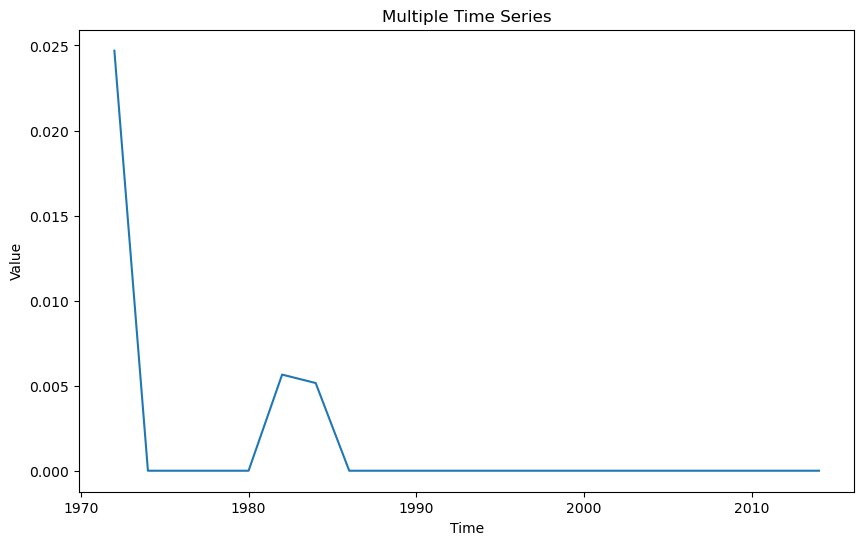

In [92]:
# Generate x-axis values (assuming time series are sampled at the same time points)
x_values = years

# Plot each time series
plt.figure(figsize=(10, 6))
for i, row in enumerate(rows_of_line_graph.T):
    plt.plot(x_values, row, label=f'{edge_names[i]}')

# Add labels and title
# plt.yscale("log")
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Multiple Time Series')
# plt.legend()

# Show the plot
plt.show()

In [104]:
weights, years = make_edge_time_series_from_graph(1972, 2018, 4, 2, "NATCITY", "NATAID")
weights

1972
NATCITY True NATAID False
NATCITY True NATAID True
1974
NATCITY True NATAID False
NATCITY True NATAID True
1976
NATCITY True NATAID True
NATCITY True NATAID True
1978
NATCITY True NATAID True
NATCITY True NATAID True
1980
NATCITY True NATAID False
NATCITY True NATAID True
1982
NATCITY True NATAID False
NATCITY True NATAID True
1984
NATCITY True NATAID False
NATCITY True NATAID True
1986
NATCITY True NATAID False
NATCITY True NATAID True
1988
NATCITY True NATAID False
NATCITY True NATAID True
1990
NATCITY True NATAID False
NATCITY True NATAID True
1992
NATCITY True NATAID False
NATCITY True NATAID True
1994
NATCITY True NATAID False
NATCITY True NATAID True
1996
NATCITY True NATAID False
NATCITY True NATAID True
1998
NATCITY True NATAID False
NATCITY True NATAID True
2000
NATCITY True NATAID False
NATCITY True NATAID True
2002
NATCITY True NATAID True
NATCITY True NATAID True
2004
NATCITY True NATAID False
NATCITY True NATAID True
2006
NATCITY True NATAID True
NATCITY True NATAID T

[None,
 None,
 0,
 0,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 0,
 None,
 0,
 0,
 0,
 0,
 0]

In [94]:
comp_data[:, coordinates_to_draw[0][0], coordinates_to_draw[1][0]]

array([ 0.02469233,  0.        ,  0.        ,  0.        ,  0.        ,
        0.00565135,  0.00515589,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        ])

In [102]:
comp_var_list[51]

'NATAID'

In [15]:
def merge_graphs_with_weight_diff(before_graph, after_graph, pct_change=False):
    # Create a new empty graph
    merged_graph = nx.Graph()

    # Add nodes from both graphs to the new graph
    merged_graph.add_nodes_from(before_graph.nodes())
    merged_graph.add_nodes_from(after_graph.nodes())

    # Get the union of edges from both graphs
    all_edges = set(before_graph.edges()).union(set(after_graph.edges()))

    # Add edges with the sum of weights
    for edge in all_edges:
        # Get the weight of the edge in graph1 (0 if the edge doesn't exist)
        
        before_weight = before_graph[edge[0]].get(edge[1], {}).get('weight', 0) if edge[0] in before_graph and edge[1] in before_graph else 0
        
        # Get the weight of the edge in graph2 (0 if the edge doesn't exist)
        after_weight = after_graph[edge[0]].get(edge[1], {}).get('weight', 0) if edge[0] in after_graph and edge[1] in after_graph else 0
        
        # Add the edge with the summed weight to the new graph
        change = (after_weight - before_weight)/((before_weight + after_weight)/2) if pct_change else after_weight - before_weight
        merged_graph.add_edge(edge[0], edge[1], weight=after_weight, type=change)

    return merged_graph

In [17]:
before_graph = nx.read_graphml("../out/belief networks/2012-2016, R=0.2, Condition=None/graph_object.graphml")
after_graph = nx.read_graphml("../out/belief networks/2014-2018, R=0.2, Condition=None/graph_object.graphml")

print([d for i, (u, v, d) in enumerate(before_graph.edges(data=True)) if i < 10])


merged_graph = merge_graphs_with_weight_diff(before_graph, after_graph, pct_change=False)

net = display_graph_pyvis(merged_graph, equal_edge_weights=False)
net.show("graph.html")

[{'weight': 0.1311082764930741}, {'weight': 0.029541663554264703}, {'weight': -0.03439463428140959}, {'weight': 0.019616557257829566}, {'weight': -0.007338891283974845}, {'weight': -0.023375322702839808}, {'weight': 0.41921445292477727}, {'weight': 0.02657307661023439}, {'weight': -0.03187243668731505}, {'weight': -0.05909564115126111}]
{'type': -0.0014565635023631729, 'width': 8.355157788448281, 'from': 'PARTYID', 'to': 'PRESLAST_DEMREP', 'color': '#f5f7f2'}
{'type': 0.004617070099174757, 'width': 0.09234140198349514, 'from': 'GRASS', 'to': 'ABNOMORE', 'color': '#faedf3'}
{'type': -0.02587859856260849, 'width': 0.5175719712521698, 'from': 'HOMOSEX', 'to': 'CONSCI', 'color': '#9ccf64'}
{'type': -0.02604321732742776, 'width': 3.7655509300905288, 'from': 'SPKCOM', 'to': 'COLCOM', 'color': '#9ccf64'}
graph.html


In [20]:
# test 

G1 = nx.Graph()
G1.add_edge("zero", "one", weight=2)
G1.add_edge("one", "two", weight=4)
G1.add_edge("two", "three", weight=6)

G2 = nx.Graph()
G2.add_edge("two", "three", weight=5)
G2.add_edge("three", "four", weight=7)
G2.add_edge("four", "five", weight=9)

# Merge the graphs
merged_G = merge_graphs_with_weight_diff(G1, G2)

# Print edges with weights of the merged graph
for u, v, data in merged_G.edges(data=True):
    print(f"({u}, {v}) - weight: {data['weight']}")

for u, v, data in merged_G.edges(data=True):
    print(f"({u}, {v}) - type: {data['type']}")

(zero, one) - weight: 2
(one, two) - weight: 4
(two, three) - weight: 6
(three, four) - weight: 0
(four, five) - weight: 0
(zero, one) - type: 2
(one, two) - type: 4
(two, three) - type: 1
(three, four) - type: -7
(four, five) - type: -9


In [21]:
from pyvis.network import Network

net = Network('1000px', '1000px', notebook=True, cdn_resources='remote')

for e in net.edges:
    print(e["type"])


print([d for u, v, d in merged_G.edges(data=True)])


[{'weight': 2, 'type': 2}, {'weight': 4, 'type': 4}, {'weight': 6, 'type': 1}, {'weight': 0, 'type': -7}, {'weight': 0, 'type': -9}]
graph.html
